In [16]:
import socket
import sys
import binascii
import numpy as np
import matplotlib.pylab as plt
import math
import codecs
import re
from Area import Area
from Punto import Punto

In [2]:
def introduceAreas():
    numero_areas=int(input('número de Areas: '))#.split(',')
    numero_vertuces=numero_areas*4
    areas=list()
    for j in range(1,numero_areas+1):
        print('coordenadas del área '+str(j)+':')
        user_input = Area()
        user_input.setLimites()
        areas.append(user_input)
    return areas

In [3]:
areas_input=introduceAreas()

número de Areas: 2
coordenadas del área 1:
intriduce coordenada X e Y separadas por "," 1:1,2
intriduce coordenada X e Y separadas por "," 2:2,3
intriduce coordenada X e Y separadas por "," 3:3,4
intriduce coordenada X e Y separadas por "," 4:4,5


coordenadas del área 2:
intriduce coordenada X e Y separadas por "," 1:5,6
intriduce coordenada X e Y separadas por "," 2:6,7
intriduce coordenada X e Y separadas por "," 3:7,8
intriduce coordenada X e Y separadas por "," 4:8,9




In [4]:
for e in areas_input:
    for p in e.getLimites():
        print(p.getX(),p.getY())

1 2
2 3
3 4
4 5
5 6
6 7
7 8
8 9


In [5]:
# Se crea el socket
sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

# Se conecta y se comprueba que la conexión se realizó con exito
server_address = ('192.168.0.10', 10940)
print (sys.stderr, 'connecting to %s port %s' % server_address)
try:
    sock.connect(server_address)
except socket.timeout:
    print('Error de conexion')
try:
    
    # Envio del mensaje (000EAR02 - Envio continuo de información de escaneo)
    message = [bytes([2]),chr(48),chr(48),chr(48),chr(69),chr(65),chr(82),chr(48),chr(50),binascii.unhexlify(b"00"),binascii.unhexlify(b"83"),bytes([3])]
    b = bytearray()
    b.extend(map(ord, message))
    print (sys.stderr, 'sending "%s"' % b)
    sock.send(b)

    # Se recoge la respuesta (En este caso la información de lectura del láser)
    num_sens=2
    amount_received = 0
    amount_expected = 4500*num_sens
    print (sys.stderr, 'reciving "%s" bytes' % amount_expected)
    sens=""
    while amount_received < amount_expected:
        data = sock.recv(32)
        #A demas de imprimirse para ver su correcto funcionamiento se almacena en forma de cadena
        sens+= data.decode('utf-8')
        amount_received += len(data)
        print (sys.stderr, 'received "%s"' % data)
    print(len(sens))
finally:
    print (sys.stderr, 'closing socket')
    sock.close()

<ipykernel.iostream.OutStream object at 0x0000019B39164F98> connecting to 192.168.0.10 port 10940
<ipykernel.iostream.OutStream object at 0x0000019B39164F98> sending "bytearray(b'\x02000EAR02\x00\x83\x03')"
<ipykernel.iostream.OutStream object at 0x0000019B39164F98> reciving "9000" bytes
<ipykernel.iostream.OutStream object at 0x0000019B39164F98> received "b'\x020010AR02126B28\x03'"
<ipykernel.iostream.OutStream object at 0x0000019B39164F98> received "b'\x02111BAR0200000000011110000000000'"
<ipykernel.iostream.OutStream object at 0x0000019B39164F98> received "b'00002C443C000000000183018501B701'"
<ipykernel.iostream.OutStream object at 0x0000019B39164F98> received "b'C201C401CA01DB01F701FD0202020001'"
<ipykernel.iostream.OutStream object at 0x0000019B39164F98> received "b'AD019901B602420278029102A602BB02'"
<ipykernel.iostream.OutStream object at 0x0000019B39164F98> received "b'BB027E02AE032705130559059005B805'"
<ipykernel.iostream.OutStream object at 0x0000019B39164F98> received "b'C205

In [6]:
#Cadena con toda la información enviada por el láser
#sens='\x020010AR02126B28\x03\x02111BAR0200000000011110000000000000005DA000000000001AA0194019901B902200239023E0224019B019B0208029902AE02CD02E602F503CC04D004FF04CE04FB04FE04F605130573058905B005D305B705BC05A505A605910596059205B804C902EA027F027F02C103E90406040803FC040103C4039D038A033902BC028502DC0341035603560348032703170319030B02CE025A02500252027502B8029E0247023F024C025E02550243024202440297030F030F02E8027D0274027E02E102E602DF02D502D002B5027B026E02680244023C023C025A029E029802750275027502680241023F02500258026B029602A702A802AB02AB02A1029B02880287027B026D025E024B024A024202380220021F02180204020201F801F401E701E001D101CD01C601C001BD01B901B401B301B101A601A0019F0199018F018F018E01850185018501800179017801780175016F0168016201620168016201620162015A01590159015801580146014801480147014301430143013E013E013E013B0139013601350134013201320127012701250121011D011D0119011901180116010A00FE00F700EF00EB00EB00EB00E600E300DB00DB00DD00E000E500E900EE00F000F000E800E000DF00E200E400EC00ED00ED00E400E400EC00ED00EC00E700E500EA00EA00EA00E000E000E800E000DF00E000DF00DF00DF00D600D600D600DE00DC00DC00D300D800D800D000CF00CD00D300D300D300CA00CD00CA00C500C800CD00CD00CE00CE00C700C600C400C200C300C300BE00BE00BE00C200C600C600BC00BC00C300C300BA00BA00BB00BC00BA00BB00BC00BC00BC00B500B500B300B300B300B700B700B600B300B700B700B600B000B700B700B000AA00AA00AA00AA00AA00B100B100B100B200B200B100B100B100B100AC00AC00B100B100B100AC00B100B100AC00AC00AC00AC00AC00AC00AC00AC00A800A800A800A800A800A0009F00A800A800A200A200A000A000A000A800A000A000A0009F009D0097009F00A000A000A0009F009700970097009F009F009B0097009700A000A000970097009700970097009B009B00A0009B009B0097009B009B009B00950095008E00920097009700940091008E008E008E008E009200940094008E008F009200930093009300960094009400940094008D008D008D008E009200970098009000900090009100910091008D008F00900090008C008C009200920091009100880088008D00900090008F008E008F009700930098009800950095008D008E008B008B008E0091008D008F008E0092009200940094009700970097009700970097009700920092009200970092009700970095009F00970097009700A000A000A000A000A000A000A000A000A000A000A000A000A000A000A000A0009B009F009F009F009D009D009F00A000A000A000A000A200A200AB009F00A0009F009F009F009F009F00AB00AB00A400A800A800AB00AB00AC00AC00AC00AC00AC00AC00AC00AC00AC00A800A800A800A800AB00AB00AB00AF00B400AF00B200B400B400AD00AD00B200AB00AB00AF00B900BA00B900B500B600B900B800B500B400B500B800B800BF00B700B700B700BE00BD00BE00BD00BD00BD00C500C800C800C400C400C700C700CD00CD00C700C600C600C500C700CF00CF00C700C700CE00CE00CE00CE00D300D300D600D600D000D000D000D600D600D600D600D600D600DF00E000E000E000E900E900E900E900E600E600F400F400ED00ED00F500F800F800F800F100F800F800F800F800F200FB00FC00F500F500FD00FE01060107010B010E010E0107010B0116010F01140116011D011D012301230121012101250125012D012D012D01290129012D012E0139013401330136013E013E013C013C014001400148014E014F014F01520152015301570157015A015A015C0161016701700176016F016B016B016E01700170017B01790176017901840188019901940194019401A001A201A601AF01AF01AE01AF01C401C401C301CA01D501D601DA01E601EE01EF01F90206020F021102260234023E02500250025B026B0284028A029702AD02BC02D802FA03060315032903410355036303760370036F036F036E036D036E0370036E03680361035E0348034502C1021D01D401D201F0026D02DE02E902DD02CA02B202A2024E01830148011600FB00EE00E700E700E600E800E700E700E400D500DE00DC00DB00D500D500CF00DB00D300D100CF00CD00C400C400C900C400C400BF00BF00BA00BA00C200C100BF00BF00BE00BD00BD00B500B400B300AA00AC00AC00AC00AD00AD00AC00A500A500A5009C009C00A200A500A5009F009F009F009F009F00980098009C009A00A100A000A0009D009900970099009900960092008C008C008D008D008C008C008C008D008D008D009600960096009600970097009700960092008E008D008D008E008E008F008F008E008E0089008900890089008E008D008C008C008C00840089008900890089008C008C008A008A008A008A0089008A008A008A008A008A0086008A008A008A008B008B008200820082007A007A007B0084007B007B007B007B007C007C007C007C007B007C008100810081008100810081007E007E007E007E007E00840084007E007C007500730071007300730073007500750075007C007C00780078007700760071007100680068006800680066006B006C006C006C00710071006C006C006E006C006C00680068006800680068006B0071006B007100780078007C007C00780076007400740079007B007D0083008A008B008A008800880089008B008B00900090008D0088008F00C50140017F01B601EB021B027102F0044D047C048804A204AA04B2050605CA0ADC0AF20AF2066606660C960CE20CCC0BEF0BED0BF40CDA0CF50CF50CEE0CEA0CE10CDA0CD70CCC0CC80CC00CC00CB10CA20CA10C9D0C8E0C8B0C810C780C8A0CB10CC20CEB0D110D430D4306B706AD0641064306350623062406270627062E06380636063C06350662AE78\x03\x02111BAR0200000000011110000000000000005DA1E0000000001AA0188018801BA021F02410241022F019301930219029C02BA02CE02E7030703CE04C604F704CC04FD04FE04F20513056C058E05B805DB05CF05C505AC05AF05900596059105B904D502E3027A027A02DA03DD040603FE03F203F203C2039D0390033102C1028E02E6033F034C03540349032203160316031202C0025A02490249027F02AF02A7024C023B023E02580258023F023F02420293030E031002E902850278027E02D002DD02DB02CC02CA02B6027302720271025102410241025C02A7029202750275027E0268024A02440250025E026802A102A902A902AC02A6029B0292028D028402730264025A024B024B022E022902200218020A020101FE01ED01EB01E701E301D601D201C801C301BC01B801AA01A901A4019701960196019F019901990189018501850185018401800180017901760172016C016C016901670160015D015801560156014F014F014D014D0149014D0147014701450140013C013B013B013A013B0139013B013901390135012F012F012E012E0125012501250124011D01160111010300F700EF00EE00EF00E900E800E500E000DD00DD00E200E600E900F100F100EB00E100E100E100E300EA00EE00EE00EE00EE00EE00EE00EE00EE00EE00EE00E300E200E100E100E000DE00DE00E000E000E000E000E000DC00D700D700E000DF00DC00D500D300D300D300D300D300D400D100D400CE00D400D400CB00C600CB00C600C400C600CE00CE00CE00C800C800C100BF00BC00BF00BF00C000BB00BB00C300C500C400C400BC00BC00BC00BC00BC00B400B300B500B500B500B400B100B100B200B200B400B800B200AF00B000B700B300B400B400B400B400B400B400B400AC00AC00B100B100B100B100B500B100B100B100B100B100B000B100AE00AE00A900A900A900A900A500A500A900A300A000A000AC00AC00AC00AC00A300A300A300A100A500A300A300A900A300A100A0009800A300A300A100A100A100A100A100A100A100A100A10098009500A000A000A000A000A000980098009C009C009C009700970098009800970097009400940097008E0095008E009500950095009000900090008C008C0095008E008C008C009300950093008F00930097009700970095008D008D008D008B00860090009000900091009800910099009100910092009200910091008800880089009300930093008A008A00910091008D0091009100910091009800980097008F008F009500950091009A009A00940094008B00960095009300930097009700920090009500970097009700930093009300920093009800980098009800980098009C009C009800980098009C00A10098009800A100A100A100A100A100A100A100A100A100A000A000A100A100A000A000A0009D00A100A900A900A900A900AC00A900A900A300A100AC00AC00AE00A900A900A900AC00AC00A900A900A500A500A900A900A900AE00AE00AE00AE00AE00AE00B100B100B100B500B500B500B100B500B500B500B500B500B500B500B500BB00BB00BB00BA00BB00BA00BA00B900B400B900B900BF00BF00BA00B700B700B500B500B700BE00BF00B600B600C600C600C600C600C500C500C600C900C900C900C400CC00CC00CC00CC00CC00CB00CB00C800D000CF00CF00CD00CF00CF00DA00DA00DA00D400D400D300D700D800DD00DD00D700D700D800DE00DE00E100E100E900EA00ED00F100F100F100F800F800F100F100F100F100F900FB00F900F200F400F400F600FD00F900F900FB00FD00FE00FE01060108010D010F010B011601110111011D011D011D011A0125012501220125012B012B01250125012D012D012D012D012D012E0133013E013E013601360142014101400148014801480145014D014D0155015701570157015C015E0160015F015F0166016A016B016C016B017201720172017B0178017801780185019201930192019D019F019F01A501B401B401B701B801B801BD01CA01CA01D201D501DD01DE01E801F801F801FC02050210021B02270237024402470260026902700286028A029B02B302CA02DF02F8030E031903330342035A036A0386038603710370037003700371037103690364035F035A0349034402C2021F01D401D401F2026402D602DD02D602CA02B202A4024201930140011E00FF00F200F000F200F200F200E700E000E000DD00DD00DC00DF00DB00DB00D800D400D300D200D000D000CA00CD00CD00C400C400C400C400BD00BB00BE00BE00B800B800BE00B500B200B200B600AD00AC00AB00AB00A800AE00A500A500A500A500A500A500A500A5009F009F00A300A400A400A400A500A500A5009A009A009A009700A3009E00970097009700980098009500980095009500950093009600990097008E008E008E008E008B008B008F008E008B008B008C008F008F00930092008A008A008E008E008A008A008A008B008B008A0085008B008B008D008D008E008E008700860086008A008D008F008B008B008C008C008400860086008300820082008200800080008000800080007B007C007C007C0085007C007C007C0080007D007D007D007D007D007D008600860086008200830083008300830083007E007E007E007F007F007F007F007F007F007D007D007D007D00790079007900760076007800770072007700740072007200720072006F00720072007200720077006D00720072007200720072006D007200720072006D00690072007200790079007D007B007B007B007B0075007400740074007E007F0088008F008D008500850086008B008B0087008500830083009000DB014A018E01B501E9021B0273031904420473048B04A104AC04BD04E205D10ADB0AF30AF3065D065D0C910CEE0CD50BEC0BE00BEC0CD70CFB0CF40CF30CEE0CDE0CD20CD20CD00CC90CB90CB20CAF0CA20C9C0C940C800C800C800C790C820CAE0CD20CF50D1E0D3F0D3F06BC06B40638063F062E062106270629062A062F06310636063D06470661554A\x03\x02111BAR0200000000011110000000000000005DB240000000001AA0188018801BD02230239023F022C019B019B020802A102BE02D402E402FF03D704CE04F504D604F804FC0501052D057B058505C605DA05BF05CA05A405B1058D059D059405C004CD02ED0286028602B503E903FB03F2040403F103BE038F038A032B02AD02'
sens

'\x020010AR02126B28\x03\x02111BAR020000000001111000000000000002C443C000000000183018501B701C201C401CA01DB01F701FD0202020001AD019901B602420278029102A602BB02BB027E02AE032705130559059005B805C205A705B60597059505690565057B05E205E2052A02DE0287028702C0038D040803FE03F803AF0399038C0380035702F1028E028702B7030203390313030C030F030C02CA025202520258027902C2029502430239023C025B024E023B02390241029E030A030A02E80284026C027902DD02DD02CD02C502C002B3026E026E026D0243023B023B026102A8029A027402710274026102410241024A0256027D02AE02B002B002B202A6029B0295028C0285026E02620257024C023E02380226021D02150213020601FE01F501ED01EA01D901D601CE01CE01C701C301BC01BC01B901B101A601A201A1019B0198019201870186018601860184017E0176017D016F016F016901690166015D015E015D015601530152014C014B014D014D014A014A01480140013F013F013A013A013201320132012E012C012C012B012301230123012201210119011801160112011601160115010A00FC00EE00E800E700E600DB00E000E000E000E000E100E200E100DF00E500E000E000DB00D800D800E000E800E200E200E200E200DC00DC00DE00E000E200E700E7

In [50]:
# Se separa los datos del resto de información enviada por el laser
sensing=re.split('\x02|\x03',sens)
#sensing = '000012BA1000000000011E011E0120012201200120011E011C0124011F011A011A012101210120011D0120011E011D011D011B011B011E011E011C01210125012501230121012301230123012501200120011B011C011C011E011C01230120012001200120012001280128011F011F0121012301230123012701270129012B012B012901290123012D012301230129012C012C012C012F013201320132013201320135012F0134013401380AC20AD00AE80B090B160B200B380B400B490B4A0B530B550B550B550B020AE80AE80AFB0B5A0B6D0B790BD70BEB0BF80C150C310C4D0C5B0B6B0AAF0AA80AA109B20756075607370734072707150721072107290727072A0733073D074D075B076107700771078D0791079F07BB07DF092F0C660C660C5A0C5A0D630DB00DE10DFE0E140E390E590E760E920EB70EE10F010F010D460D1E0D1A0D150D110D090D010CF90CF90CE90CE90CE80CE60CE20CDC0CD80CD20CD20CD00CC20CBB0CB80CAB0CA30C990C910C910C8D0CB30CD00D0F0D160D120D0A0D020CF80CF80CEF0CEB0CE70CE70CE40CE10CDD0CDA0CD80CD30CD20CD00CD00CC30CC00CBD0CB60CB20CB00CB40CB40CB20CAA0CAA0CA50CA50C9B0C9C0C9C0CA30C970C910C920C920C930C900C900C8F0C8D0C8D0C8D0C840C880C880C810C7E0C780C770C770C770C770C710C700C670C670C5C0C530C510C510C4D0C530C4E0C4E0C500C500C4E0C4E0C4D0C4D0C4A0C4A0C530C5B0C600C750C780C780C780C7E0C7E0C7B0C7B0C7A0C7B0C7D0C7D0C7D0C850C850C880C880C860C850C860C8E0C8C0C8C0C900C990CA10CEE0E2A0E360E3E0E440E4C0E4C0E4C0E570E570E570E5A0E5A0E5C0E630E650E6A0E700E6D0E6D0E770E790E820E890E890E8F0E950E960E9B0E9C0E9E0EAB0EAB0EAB0C03092F08FD08F908FF09610D7C0D940D770D880D830D8D0D870D9C0D910D970D940DA30DAC0DBF0DB20DCD0DCD0DC20DD60DE1065B063D063B064906510656063704AB04590428041E0418040903FC03F603EF03EA03E903DA03D403CD03C503BF03BF03AF03A903A9039F039B039A03950395038C0383037F037B037103700371036F036C0367035C0359035903530353035C036603640364034E034A034C034C034C035C043F05AC05F3060C0608060A05F805ED05F505F405EE05EB060706190615061C0626062206300638063D0643064F0658065006590658065A066706600657067A0685013901390343031D02D2020801990176015701470138013F01440154017301A5020D02E6038703FC05C405BE05E405E205F005EA05EA05ED05DB05D805DF05D405D705CC05C805C005CB05C205BD05C005C305BD05C105AC05B505B005AB05A5059D05A7059F0598059A0594058E0591059705920586058D05940592058C0583057C057C0577056C056E0571056805750575056C05670563055E056A05670568056605670569055D055A052A041A036903380338033903420341032C0319031B0320033A034403400345034E034303160312030B03190328033303470347034403420346036F0374037F03820382038203820385039D03A503B603B903BD03C303CB03CD03D903DC03DF0437044A04490447043E0435043004250425041D041D041904100410040C040A040304050405040103FE03F003F403F403F403F303F003ED03ED03EE04030403040303FC03F803F703F303F203F303F303F303EE03EE03E603E503E503E203E203E203E203DF03DF03D903D303D403D403D403D403D303D203D603EA03F90403040E040E042A042C043704480448045C03F002CB023E01FA01D901720162017F01C901EA01EA01E701E401D401D001D201D701D701D701D101CE01BE01A2019901960194018D018C018A018901880186017E018001860186017E0183017E017D017C017B017B017401740175017201720172016C016C016C015F01610161015E015E015E015E015E015D015C0159014E014E015701570157015E015C015E01690169016A0167015E015201520153015101510144013C013A0136013601370137013601360132012D012D01330136013C013C013C013C013B013B01410141014001420140013F0142014B014E014E015701570157015701570158015E0160016001590161016501660162015D015D01610168017401710166015A015201590157015701570157015701570167017A017A017C017C017D017D017D017D017901730162015901510151015001480148014F01480140013C0139013A013A013C013C013C01410141012E0116010900EC00E700E600E9010C011C01250120011000EC00E600D500D600E100F301060113010300EB00EB00EB00D400C700C900D000DF01290135014601460132010E00FE00FE00FE011E0135014401470147014701450136012D0107010501070120012F01400143014101410132010900C700BA00C600C600EB00FB00F500DD00DD00DD00F1011E01320139013A013B01380136013301380133012301230124013701350133012B00FE00FB00FE0100012B013501350114010300FC011C01330137013801360134013601360132013201320134012C012C012C012C012C012C012C012C012C012C012C01230124012C012C012C012C01250125012401240124012601270124012801240124012401250126012701270127012701260126012101210121012901290122011D01220122012201220122011B0122011B011B0122011B01280128012101200120012801280126012601250124012401240124012401220120011F011F012701270125012501250125012A012A012A012A012301230123012301230123012C012C012C01320132012D012C012C012C012C0134012C012C012D01320132012C012C012C0134012D012D012D012D0133013401340136013601360136013601360136012D0136013601360131013401340134013801380139013A013A013A013A01340135013B013B0135013B013E013C013C013D014001'

In [51]:
for e in sensing:
    print(len(e))
    if (len(e)<50):
        sensing.remove(e)

0
0
0
0


In [52]:
sensing

['0010AR02126B28',
 '111BAR020000000001111000000000000002C443C000000000183018501B701C201C401CA01DB01F701FD0202020001AD019901B602420278029102A602BB02BB027E02AE032705130559059005B805C205A705B60597059505690565057B05E205E2052A02DE0287028702C0038D040803FE03F803AF0399038C0380035702F1028E028702B7030203390313030C030F030C02CA025202520258027902C2029502430239023C025B024E023B02390241029E030A030A02E80284026C027902DD02DD02CD02C502C002B3026E026E026D0243023B023B026102A8029A027402710274026102410241024A0256027D02AE02B002B002B202A6029B0295028C0285026E02620257024C023E02380226021D02150213020601FE01F501ED01EA01D901D601CE01CE01C701C301BC01BC01B901B101A601A201A1019B0198019201870186018601860184017E0176017D016F016F016901690166015D015E015D015601530152014C014B014D014D014A014A01480140013F013F013A013A013201320132012E012C012C012B012301230123012201210119011801160112011601160115010A00FC00EE00E800E700E600DB00E000E000E000E000E100E200E100DF00E500E000E000DB00D800D800E000E800E200E200E200E200DC00DC00DE00E000E200E700E700E600

In [57]:
dato=sensing[1][48:]
dato

'00183018501B701C201C401CA01DB01F701FD0202020001AD019901B602420278029102A602BB02BB027E02AE032705130559059005B805C205A705B60597059505690565057B05E205E2052A02DE0287028702C0038D040803FE03F803AF0399038C0380035702F1028E028702B7030203390313030C030F030C02CA025202520258027902C2029502430239023C025B024E023B02390241029E030A030A02E80284026C027902DD02DD02CD02C502C002B3026E026E026D0243023B023B026102A8029A027402710274026102410241024A0256027D02AE02B002B002B202A6029B0295028C0285026E02620257024C023E02380226021D02150213020601FE01F501ED01EA01D901D601CE01CE01C701C301BC01BC01B901B101A601A201A1019B0198019201870186018601860184017E0176017D016F016F016901690166015D015E015D015601530152014C014B014D014D014A014A01480140013F013F013A013A013201320132012E012C012C012B012301230123012201210119011801160112011601160115010A00FC00EE00E800E700E600DB00E000E000E000E000E100E200E100DF00E500E000E000DB00D800D800E000E800E200E200E200E200DC00DC00DE00E000E200E700E700E600E500E500DD00DC00DC00DC00DC00DC00DB00D900D900D200D200D200D200CC00CC00

In [58]:
long, substr = int(len(dato)), int(len(dato)/1081)
separated_data=[ [dato[i:i+substr]] for i in range(0, long, substr) ]

In [59]:
separated_data

[['0018'],
 ['3018'],
 ['501B'],
 ['701C'],
 ['201C'],
 ['401C'],
 ['A01D'],
 ['B01F'],
 ['701F'],
 ['D020'],
 ['2020'],
 ['001A'],
 ['D019'],
 ['901B'],
 ['6024'],
 ['2027'],
 ['8029'],
 ['102A'],
 ['602B'],
 ['B02B'],
 ['B027'],
 ['E02A'],
 ['E032'],
 ['7051'],
 ['3055'],
 ['9059'],
 ['005B'],
 ['805C'],
 ['205A'],
 ['705B'],
 ['6059'],
 ['7059'],
 ['5056'],
 ['9056'],
 ['5057'],
 ['B05E'],
 ['205E'],
 ['2052'],
 ['A02D'],
 ['E028'],
 ['7028'],
 ['702C'],
 ['0038'],
 ['D040'],
 ['803F'],
 ['E03F'],
 ['803A'],
 ['F039'],
 ['9038'],
 ['C038'],
 ['0035'],
 ['702F'],
 ['1028'],
 ['E028'],
 ['702B'],
 ['7030'],
 ['2033'],
 ['9031'],
 ['3030'],
 ['C030'],
 ['F030'],
 ['C02C'],
 ['A025'],
 ['2025'],
 ['2025'],
 ['8027'],
 ['902C'],
 ['2029'],
 ['5024'],
 ['3023'],
 ['9023'],
 ['C025'],
 ['B024'],
 ['E023'],
 ['B023'],
 ['9024'],
 ['1029'],
 ['E030'],
 ['A030'],
 ['A02E'],
 ['8028'],
 ['4026'],
 ['C027'],
 ['902D'],
 ['D02D'],
 ['D02C'],
 ['D02C'],
 ['502C'],
 ['002B'],
 ['3026'],
 ['E026'],

In [60]:
def toDecimal(sensin):
    total=[]
    for elem in sensin:
        res=""
        for i in elem:
            t=int(i,16)
            if t > 0x30 and t < 0x39:
                t = t - 0x30
            elif t > 0x41 and t < 0x46:
                t = t - 0x37
            binario = bin(int(t))
            res = res + str(binario)
        total.append(str(int(res,2)))
    return total

In [61]:
final=toDecimal(separated_data)
print(len(final))
#final

1083


In [62]:
def creaangulos(x, y, jump):
    while x < y:
        yield x
        x += jump

In [63]:
angulos=list(creaangulos(-45,225,270/1081))
print(len(angulos))

1081


In [64]:
cartesianos=[]
for i in range(1081):
    p=Punto(int(final[i]),angulos[i])
    cartesianos.append(p)

for p in cartesianos:
        print(p.getX(),p.getY())

24 -45
12312 -44.75023126734505
20507 -44.5004625346901
28700 -44.25069380203515
8220 -44.0009250693802
16412 -43.75115633672525
40989 -43.5013876040703
45087 -43.25161887141535
28703 -43.0018501387604
53280 -42.752081406105454
8224 -42.502312673450504
26 -42.252543940795555
53273 -42.002775208140605
36891 -41.753006475485655
24612 -41.503237742830706
8231 -41.253469010175756
32809 -41.00370027752081
4138 -40.75393154486586
24619 -40.50416281221091
45099 -40.25439407955596
45095 -40.00462534690101
57386 -39.75485661424606
57394 -39.50508788159111
28753 -39.25531914893616
12373 -39.00555041628121
36953 -38.75578168362626
91 -38.50601295097131
32860 -38.25624421831636
8282 -38.00647548566141
28763 -37.75670675300646
24665 -37.50693802035151
28761 -37.25716928769656
20566 -37.00740055504161
36950 -36.757631822386664
20567 -36.507863089731714
45150 -36.258094357076764
8286 -36.008325624421815
8274 -35.758556891766865
41005 -35.508788159111916
57384 -35.259019426456966
28712 -35.00925069380

8221 134.83348751156203
20509 135.08325624421698
40989 135.33302497687194
45085 135.5827937095269
61470 135.83256244218185
20511 136.0823311748368
16415 136.33209990749177
32799 136.58186864014672
57376 136.83163737280168
8224 137.08140610545664
45090 137.3311748381116
4130 137.58094357076655
12322 137.8307123034215
61475 138.08048103607646
24612 138.33024976873142
49189 138.58001850138638
8231 138.82978723404133
4137 139.0795559666963
12330 139.32932469935125
4139 139.5790934320062
43 139.82886216466116
45100 140.07863089731612
53293 140.32839962997107
53295 140.57816836262603
12336 140.827937095281
45104 141.07770582793594
61490 141.3274745605909
24627 141.57724329324586
28725 141.8270120259008
24630 142.07678075855577
36918 142.32654949121073
53302 142.57631822386568
16438 142.82608695652064
16438 143.0758556891756
24630 143.32562442183055
12342 143.5753931544855
4149 143.82516188714047
61493 144.07493061979542
24629 144.32469935245038
24629 144.57446808510534
12340 144.824236817760

In [68]:
def apolares(p):
    x=p.getX()
    y=p.getY()
    c1=math.sqrt(x*x+y*y)
    c2=0
    if x == 0:
        if y > 0:
            c2=90
        elif y < 0:
            c2=270
    elif x > 0:
        if y > 0:
            c2= math.atan(y/x)
        elif y < 0:
            c2=360-math.atan(y/x)
    else:
        if y > 0:
            c2= 180- math.atan(y/x)
        elif y < 0:
            c2=180+math.atan(y/x)
        else:
            c2=270
    punPol=Punto(c1,c2)
    return punPol

In [69]:
polares=[]
xs=[]
ys=[]
for pun in cartesianos:
    punto=apolares(pun)
    xs.append(punto.getX())
    ys.append(punto.getY())
    polares.append(punto)
for p in polares:
        print(p.getX(),p.getY())

51.0 361.0808390005412
12312.081326209573 360.0036346681453
20507.04828324071 360.0021700098837
28700.034113636553 360.0015418347992
8220.117765665342 360.0053528594664
16412.058315874972 360.0026657965329
40989.023083878485 360.00106129379276
45087.020745471025 360.0009592921597
28703.032211930422 360.00149816458094
53280.017152216315 360.0008024037581
8224.109827001497 360.0051680367559
49.61126353429087 361.01916821866394
53273.01655841468 360.000788443799
36891.02362789016 360.00113179335466
24612.034993448695 360.0016862993013
8231.103379784838 360.00501192122334
32809.02562258496 360.001249769238
4138.200681810436 360.00984838423216
24619.03331951125 360.0016452384852
45099.017965098115 360.0008925781811
45095.01774442548 360.00088711863515
57386.01377033105 360.0006927621764
57394.01359594891 360.0006883137896
28753.026796844908 360.001365259095
12373.06148182265 360.0031524627175
36953.02032325117 360.0010487854159
98.81150253578969 360.40029670041747
32860.02226932023 360.0011

16402.447021447806 0.007382880564173032
20498.35917447733 0.0059198242974513315
36882.20044310161 0.003296873925596208
49170.150969151386 0.002478040756729511
49171.15158563934 0.0024830699236207815
24595.304293939414 0.004974346077264543
28691.261918740965 0.004272910442582955
28691.262987064292 0.00428161575655484
40979.18487745631 0.003003830909728312
40979.18562847939 0.003009925896780766
40979.186381024796 0.003016020883609588
61460.12477414062 0.002015025962566444
24596.313040369838 0.005045226016489147
125.94138148472638 1.4113171252906715
126.3503385117246 1.4038169101378466
126.59664009211713 1.4041448232502811
126.84295523220162 1.4044714628549555
8213.956396650174 0.015260263703686897
20501.384693761964 0.0061260657186543695
20501.386225373477 0.006138248506841692
28693.277053815553 0.0043944784511048595
45077.17705376937 0.002802782345154978
53270.1504157018 0.0023764009955939296
16406.490319714496 0.007731217901382724
8214.983142712203 0.01547120971126455
24598.32960962948

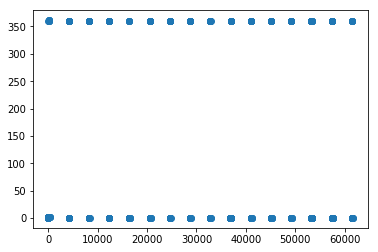

In [70]:
equis= np.array(xs)
ies=np.array(ys)
plt.scatter(equis,ies)#,angulos)
plt.show()

In [ ]:
message = [bytes([2]),chr(48),chr(48),chr(48),chr(69),chr(65),chr(82),chr(48),chr(49),binascii.unhexlify(b"9B"),binascii.unhexlify(b"B1"),bytes([3])]
message 
b = bytearray()
b.extend(map(ord, message))
b